In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Reading Data
Reading Objects.csv and showing first 5 Rows with all Collumns

In [3]:
# Read Dataset
objects = pd.read_csv('./startup-investments/objects.csv')
pd.set_option('display.max_columns', None)
objects.head()


/tmp/ipykernel_39285/22073810.py:2: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv('./startup-investments/objects.csv')


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


## Selecting Data
Select some interesting Rows to shrink Dataset
Also select only the Companies

In [14]:
# select interesting columns
df_objects = objects[['name','entity_type','category_code','status', 'founded_at', 'funding_total_usd']]

# only select Companies (get rid of people or other entities)
df_companies = df_objects.loc[df_objects['entity_type'] == 'Company']
df_companies = df_companies.drop('entity_type', axis=1)

df_companies = df_companies.dropna()
df_companies.head(20)

,name,category_code,status,founded_at,funding_total_usd
0,Wetpaint,web,operating,2005-10-17,39750000.0
3,MYWEBBO,network_hosting,operating,2008-07-26,0.0
4,THE Movie Streamer,games_video,operating,2008-07-26,0.0
5,Synergie Media,advertising,operating,2007-06-27,0.0
6,Green Basti Ecosystems,cleantech,operating,2008-08-20,0.0
9,Vetter Idea Management System,enterprise,operating,2011-08-01,0.0
10,ChatRandom,games_video,operating,2011-02-01,0.0
11,ScapadasAmorosas,other,operating,2007-03-01,0.0
12,dimension5 labs,advertising,operating,2008-08-01,0.0
13,FriendFeed,web,acquired,2007-10-01,5000000.0


## Status of all Startups

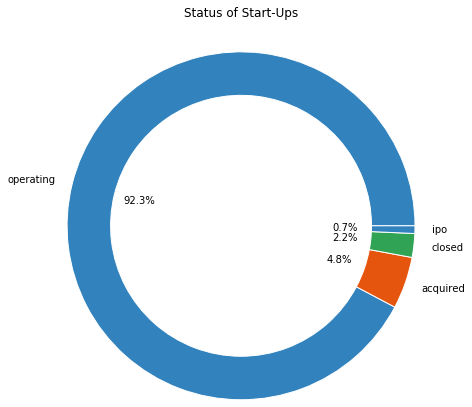

In [8]:
status=df_companies.status.value_counts()
plt.figure()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.pie(status.values, radius=2, colors=outer_colors,labels=status.index,autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Status of Start-Ups',pad=100)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

## Wordcloud of Startup Categories

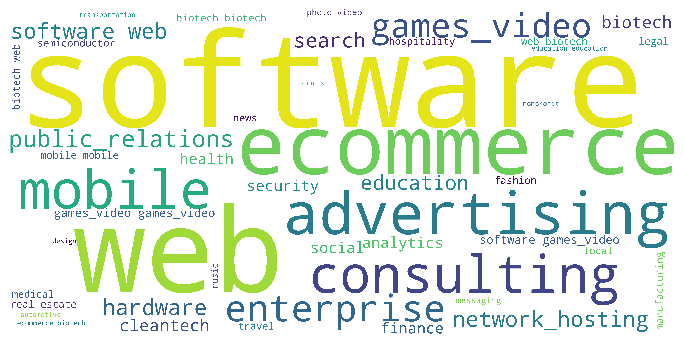

In [12]:
import wordcloud

w=wordcloud.WordCloud(background_color='White',scale=32)

categ = ' '.join(df_companies.category_code)

fig = plt.figure(figsize=(12, 8))
w.generate(categ)
plt.axis('off')
plt.imshow(w)


## total Fundings in USD

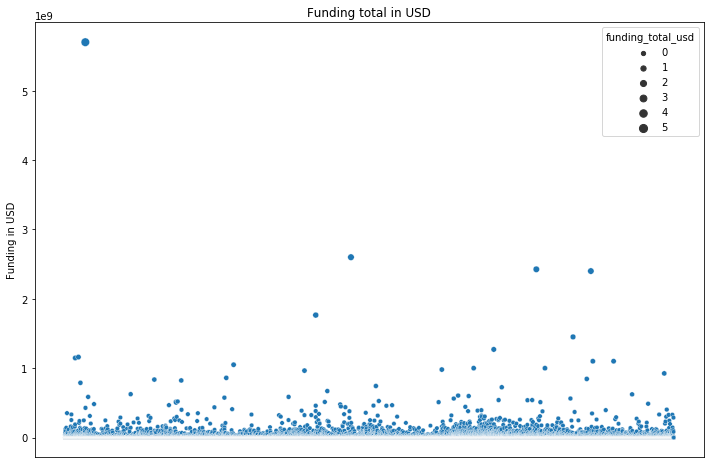

In [18]:
fundings = df_companies[['name','funding_total_usd']]

plt.figure(figsize=(12,8))
sns.scatterplot(data=fundings,x='name',y='funding_total_usd',size='funding_total_usd')
plt.xticks([])
plt.title('Funding total in USD')
plt.xlabel("")
plt.ylabel("Funding in USD")
plt.show()

# plot takes 1minute to show :D

## Fundings over Time

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


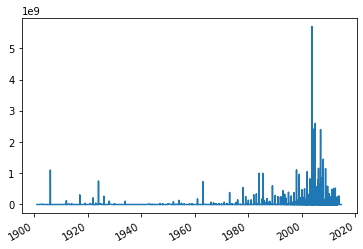

In [36]:
df_companies.founded_at = pd.to_datetime(df_companies.founded_at)
df_companies = df_companies.sort_values(by=['founded_at'])

plt.plot(df_companies.founded_at, df_companies.funding_total_usd)
plt.gcf().autofmt_xdate()
plt.show()


## Top 50 highest Fundings

In [41]:
# take top 50 fundings and check what companies have in common


df_funds = df_companies.sort_values(by=['funding_total_usd'], ascending=False)

df_topfunds = df_funds.head(100)
df_topfunds.head(10)



,name,category_code,status,founded_at,funding_total_usd
4575,Clearwire,mobile,acquired,2003-10-01,5.700000e+09
97784,sigmacare,health,operating,2005-01-01,2.600000e+09
161551,Facebook,social,ipo,2004-02-01,2.425700e+09
175825,Carestream,biotech,operating,2007-01-01,2.400000e+09
81001,Solyndra,manufacturing,operating,2005-01-01,1.765504e+09
170979,Fisker Automotive,automotive,operating,2008-01-01,1.451000e+09
151715,O3b Networks,enterprise,operating,2008-01-01,1.270283e+09
2971,Twitter,social,ipo,2006-03-21,1.160167e+09
2225,Groupon,web,ipo,2008-11-11,1.147288e+09
181834,Xerox,hardware,ipo,1906-01-01,1.100000e+09


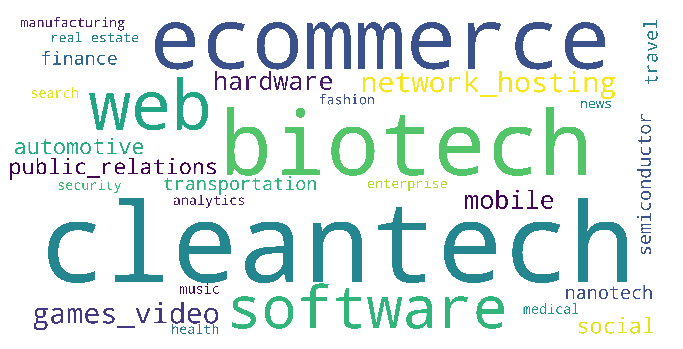

In [42]:
import wordcloud

w=wordcloud.WordCloud(background_color='White',scale=32)

categ = ' '.join(df_topfunds.category_code)

fig = plt.figure(figsize=(12, 8))
w.generate(categ)
plt.axis('off')
plt.imshow(w)
